In [2]:
import tensorflow as tf

In [4]:
train=r"/home/teaching/Atmega_MIC/DP Students/Abhay/cropwise_data/citrus"
training_set = tf.keras.utils.image_dataset_from_directory(
    train,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=16,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 5256 files belonging to 4 classes.


In [5]:
class_name = training_set.class_names
class_name

['citrus_black_spot', 'citrus_canker', 'citrus_greening', 'citrus_healthy']

In [6]:
total_batches = tf.data.experimental.cardinality(training_set).numpy()
train_size = int(0.8 * total_batches)
val_size = total_batches - train_size

In [7]:
train_dataset = training_set.take(train_size)
val_dataset = training_set.skip(train_size)
print(len(training_set))
print(len(train_dataset))
print(len(val_dataset))

329
263
66


In [11]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze base

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(4, activation='softmax')  # 6 classes
])

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])


In [12]:
from tensorflow.keras.layers import Rescaling, RandomFlip, RandomRotation
from tensorflow.keras import Sequential

preprocessing = Sequential([
    Rescaling(1./255),
    RandomFlip("horizontal"),
    RandomRotation(0.1)
])

train_ds = train_dataset.map(lambda x, y: (preprocessing(x), y))
val_ds = val_dataset.map(lambda x, y: (x / 255.0, y))


In [14]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=10,
                    callbacks=[early_stop])


Epoch 1/10
263/263 [==============================] - ETA: 0s - loss: 0.1895 - categorical_accuracy: 0.9256

2025-05-02 04:32:51.284593: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


263/263 [==============================] - 23s 88ms/step - loss: 0.1895 - categorical_accuracy: 0.9256 - val_loss: 0.1583 - val_categorical_accuracy: 0.9370
Epoch 2/10
263/263 [==============================] - ETA: 0s - loss: 0.1225 - categorical_accuracy: 0.9546

2025-05-02 04:33:13.722568: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


263/263 [==============================] - 22s 84ms/step - loss: 0.1225 - categorical_accuracy: 0.9546 - val_loss: 0.1277 - val_categorical_accuracy: 0.9523
Epoch 3/10
263/263 [==============================] - ETA: 0s - loss: 0.0922 - categorical_accuracy: 0.9701

2025-05-02 04:33:35.411081: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


263/263 [==============================] - 22s 82ms/step - loss: 0.0922 - categorical_accuracy: 0.9701 - val_loss: 0.1142 - val_categorical_accuracy: 0.9571
Epoch 4/10
263/263 [==============================] - ETA: 0s - loss: 0.0731 - categorical_accuracy: 0.9777

2025-05-02 04:33:57.443621: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


263/263 [==============================] - 22s 83ms/step - loss: 0.0731 - categorical_accuracy: 0.9777 - val_loss: 0.1057 - val_categorical_accuracy: 0.9609
Epoch 5/10
263/263 [==============================] - ETA: 0s - loss: 0.0600 - categorical_accuracy: 0.9838

2025-05-02 04:34:19.417600: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


263/263 [==============================] - 22s 83ms/step - loss: 0.0600 - categorical_accuracy: 0.9838 - val_loss: 0.1046 - val_categorical_accuracy: 0.9618
Epoch 6/10
263/263 [==============================] - ETA: 0s - loss: 0.0499 - categorical_accuracy: 0.9860

2025-05-02 04:34:41.376392: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


263/263 [==============================] - 22s 83ms/step - loss: 0.0499 - categorical_accuracy: 0.9860 - val_loss: 0.1048 - val_categorical_accuracy: 0.9618
Epoch 7/10
263/263 [==============================] - ETA: 0s - loss: 0.0410 - categorical_accuracy: 0.9907

2025-05-02 04:35:03.137099: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


263/263 [==============================] - 22s 84ms/step - loss: 0.0410 - categorical_accuracy: 0.9907 - val_loss: 0.0956 - val_categorical_accuracy: 0.9647
Epoch 8/10
263/263 [==============================] - ETA: 0s - loss: 0.0354 - categorical_accuracy: 0.9933

2025-05-02 04:35:25.246783: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


263/263 [==============================] - 22s 83ms/step - loss: 0.0354 - categorical_accuracy: 0.9933 - val_loss: 0.0968 - val_categorical_accuracy: 0.9666
Epoch 9/10
263/263 [==============================] - ETA: 0s - loss: 0.0287 - categorical_accuracy: 0.9964

2025-05-02 04:35:47.236980: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


263/263 [==============================] - 22s 83ms/step - loss: 0.0287 - categorical_accuracy: 0.9964 - val_loss: 0.0991 - val_categorical_accuracy: 0.9628
Epoch 10/10
263/263 [==============================] - ETA: 0s - loss: 0.0247 - categorical_accuracy: 0.9979

2025-05-02 04:36:09.191293: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


263/263 [==============================] - 22s 84ms/step - loss: 0.0247 - categorical_accuracy: 0.9979 - val_loss: 0.0943 - val_categorical_accuracy: 0.9666


In [15]:
train_loss,train_acc = model.evaluate(train_ds)

263/263 [==============================] - 17s 66ms/step - loss: 0.0199 - categorical_accuracy: 0.9974


In [16]:
model.save("trained_model_citrus.keras")

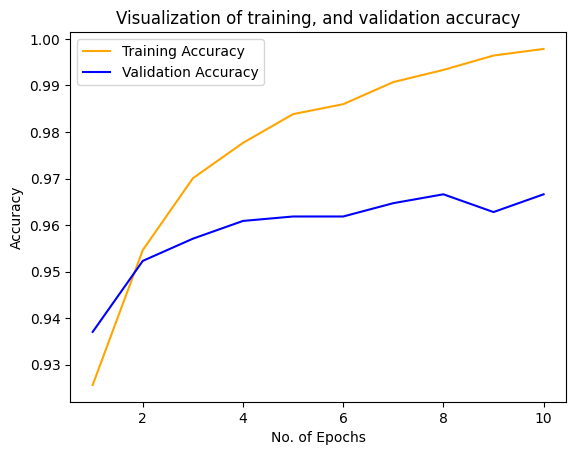

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
epochs=[i for i in range(1,11)]
plt.plot(epochs,history.history['categorical_accuracy'],color='orange',label='Training Accuracy')
plt.plot(epochs,history.history['val_categorical_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.title('Visualization of training, and validation accuracy')
plt.legend()
plt.show()
